In [3]:
import geopandas as gpd
from bokeh.layouts import column
from sympy.printing.pretty.pretty_symbology import line_width

   objectid  id  r_p_v_e     fenomeno  taxonomia  \
0         1   1  Amenaza  Hundimiento  Geológico   
1         2   2  Amenaza  Hundimiento  Geológico   
2         3   3  Amenaza  Hundimiento  Geológico   
3         4   4  Amenaza  Hundimiento  Geológico   
4         5   5  Amenaza  Hundimiento  Geológico   

                                          descripcio  \
0  El hundimiento regional, se utiliza para expli...   
1  El hundimiento regional, se utiliza para expli...   
2  El hundimiento regional, se utiliza para expli...   
3  El hundimiento regional, se utiliza para expli...   
4  El hundimiento regional, se utiliza para expli...   

                                              fuente cve_mun nom_mun  \
0   Centro de Investigación en Geografía y Geomát...     N/A     N/A   
1   Centro de Investigación en Geografía y Geomát...     N/A     N/A   
2   Centro de Investigación en Geografía y Geomát...     N/A     N/A   
3   Centro de Investigación en Geografía y Geomát...     N/A  

<Axes: >

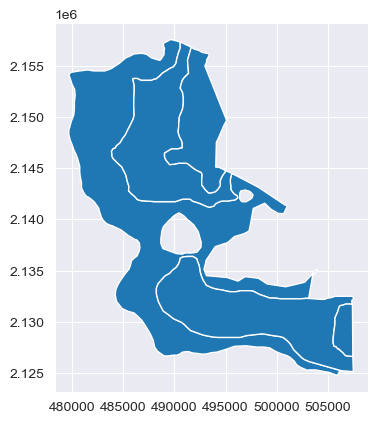

In [6]:
gdf = gpd.read_file('data/inestabilidad_laderas/hundimientos.geojson')

print(gdf.head())

gdf.plot()

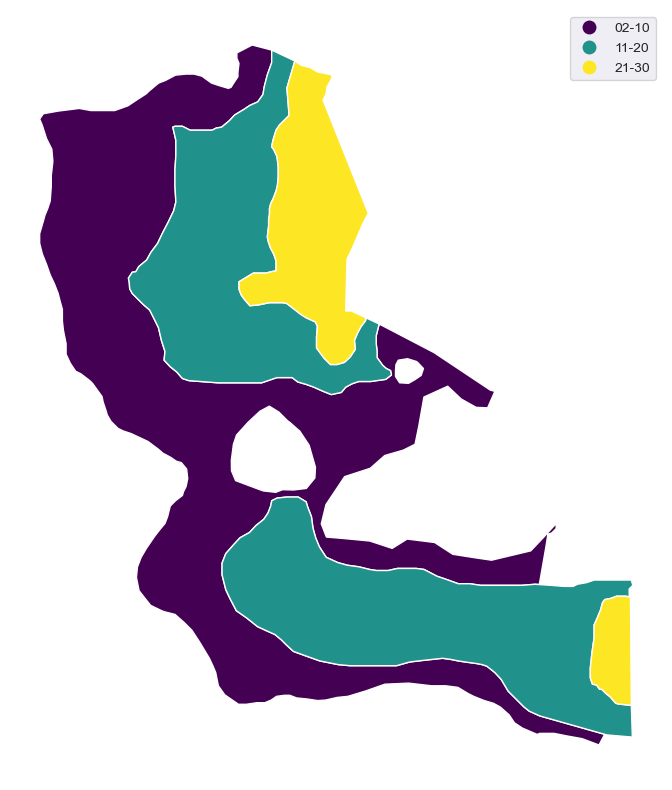

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='magni_num',
    ax=ax,
    cmap='viridis',
    linewidth=1,
    edgecolor='w',
    legend=True,
)

ax.axis('off')

plt.show()

In [15]:
import folium
width = 800
height = 600

m = folium.Map(location=[19.4210812, -99.0413559], zoom_start=10, width=width, height=height)

def get_color(magni_num):
    if magni_num == '02-10':
        return 'green'
    elif magni_num == '11-20':
        return 'yellow'
    elif magni_num == '21-30':
        return 'red'
    else:
        return 'gray'
    
    
folium.GeoJson(
    gdf, 
    name='Hundimientos',
    style_function=lambda x: {
        'fillColor': get_color(x['properties']['magni_num']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.8,
    },
).add_to(m)

folium.LayerControl().add_to(m)

m